# best nk=10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np
import math
import validate
from sklearn.preprocessing import StandardScaler
import PR_curve
import extract_sound

In [2]:
data_dir='fixed_csv_label_ver2'
df = pd.read_csv( os.path.join(data_dir, 'learning_data_10.csv') )
df=df[df['day']<=9]
df

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
3995345,45.9,0,5,9
3995346,45.6,0,5,9
3995347,45.8,0,5,9
3995348,45.7,0,5,9


In [3]:
def make_data(x, str,w):
    x=pd.DataFrame(x)
    window=w
    for i in range(1, window):
        column=f'{str}_lag{i}'
        x[column]=x[str].shift(i)
    return x

def make_label(x, w):
    window=w
    x['label_all']=x['label']
    for i in range(1, window):
        x.loc[(x['label_all']==1)|(x['label'].shift(i)==1), 'label_all']=1
        x.loc[(x['label_all']==0)&(x['label'].shift(i)==0), 'label_all']=0
    
    x['label']=x['label_all']
    return x[['label']]

df_list=[]
for i in set(df['day']):
    lag=[] 
    window=5
    lag.append(make_data(df.loc[df['day']==i, ['original']], 'original', window))
    lag.append(df.loc[df['day']==i, ['day']])
    lag.append(make_label(df.loc[df['day']==i, ['label']], window))
    df_add_lag=pd.concat(lag, axis=1)
    df_list.append(df_add_lag)
df=pd.concat(df_list)
df=df.dropna().reset_index(drop=True)
df

,original,original_lag1,original_lag2,original_lag3,original_lag4,day,label
0,53.6,53.2,52.8,52.8,53.4,0,0
1,54.0,53.6,53.2,52.8,52.8,0,0
2,54.7,54.0,53.6,53.2,52.8,0,0
3,55.7,54.7,54.0,53.6,53.2,0,0
4,55.5,55.7,54.7,54.0,53.6,0,0
...,...,...,...,...,...,...,...
3995305,45.9,45.6,45.4,45.9,46.0,9,0
3995306,45.6,45.9,45.6,45.4,45.9,9,0
3995307,45.8,45.6,45.9,45.6,45.4,9,0
3995308,45.7,45.8,45.6,45.9,45.6,9,0


# nk 1~10

nk=1


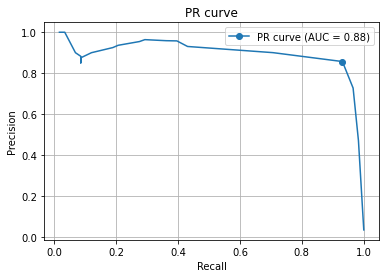

AUC：0.8799284059620169
閾値：0.15789473684210525
F値：0.8923115295878281
適合率：0.8566810344827587
再現率：0.9310344827586207
-----------------------------------------------------------------------
nk=2


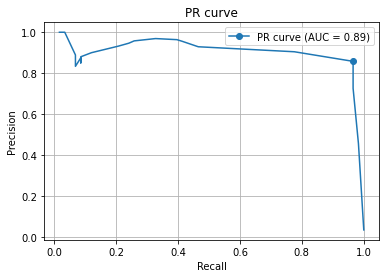

AUC：0.8873944576864744
閾値：0.15789473684210525
F値：0.9084102820064887
適合率：0.8576814326107446
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=3


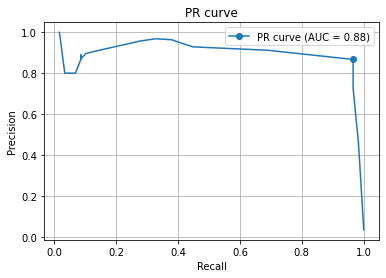

AUC：0.8793826341074507
閾値：0.15789473684210525
F値：0.9136024777613714
適合率：0.8669856459330143
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=4


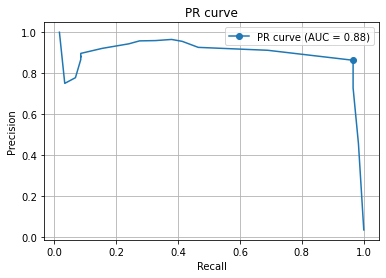

AUC：0.8777090030159135
閾値：0.15789473684210525
F値：0.9113924050632911
適合率：0.863013698630137
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=5


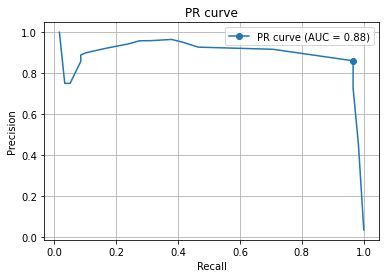

AUC：0.8788400007107086
閾値：0.15789473684210525
F値：0.9099462814053585
適合率：0.8604240282685512
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=6


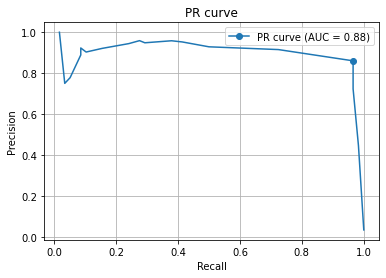

AUC：0.8809745006894247
閾値：0.15789473684210525
F値：0.9098450692679728
適合率：0.8602430555555556
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=7


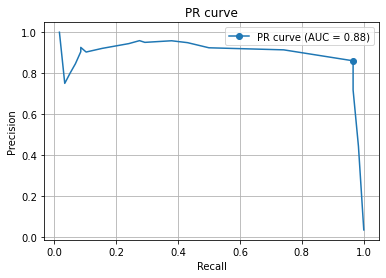

AUC：0.8813291318763594
閾値：0.15789473684210525
F値：0.9099255070760337
適合率：0.8603868797308662
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=8


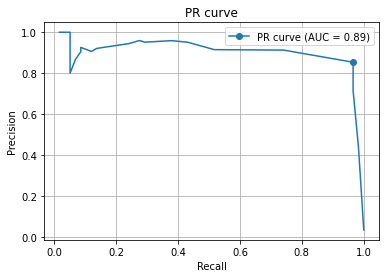

AUC：0.8862028075440117
閾値：0.15789473684210525
F値：0.9060145732987527
適合率：0.8534201954397395
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=9


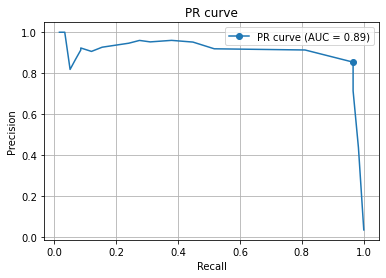

AUC：0.8885276620805546
閾値：0.15789473684210525
F値：0.9062579975010162
適合率：0.8538522637013503
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=10


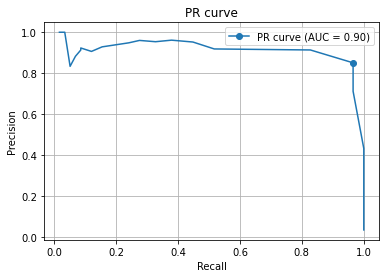

AUC：0.8953577258108075
閾値：0.15789473684210525
F値：0.9043478260869565
適合率：0.8504672897196262
再現率：0.9655172413793104
-----------------------------------------------------------------------


In [6]:
test_day=[3]
original = pd.read_csv( os.path.join(data_dir, 'learning_data_10.csv') )
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    print(f'nk={i}')
    train=df[(df['label']==0)&(~df['day'].isin(test_day))][df.columns[:-2]].reset_index(drop=True)
    test=df[(df['day'].isin(test_day))][df.columns[:-2]].reset_index(drop=True)
    
    nk = i
    neigh = NearestNeighbors(n_neighbors=nk)
    neigh.fit(train)
    d = neigh.kneighbors(test)[0]
    d = np.mean(d, axis=1)
    mx = np.max(d)
    d = d / mx
    
    test_v=original[original['day'].isin(test_day)][['original', 'label']].reset_index(drop=True)
    test_v['d']=d[0]
    test_v.loc[window-1:, 'd']=d
    
    d=test_v['d'].values
    thr_bins=20
    p_score, r_score, f_score, thresholds, thr, auc = PR_curve.fig_pr(test_v, d, thr_bins)
    print(f'AUC：{auc}')
    print(f'閾値：{thr}')
    print(f'F値：{f_score.max()}')
    print(f'適合率：{p_score[np.argmax(f_score)]}')
    print(f'再現率：{r_score[np.argmax(f_score)]}')
    print('-----------------------------------------------------------------------')

# nk 10~19

nk=10


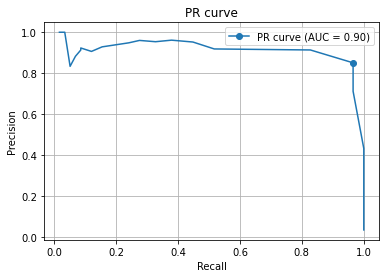

AUC：0.8953577258108075
閾値：0.15789473684210525
F値：0.9043478260869565
適合率：0.8504672897196262
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=11


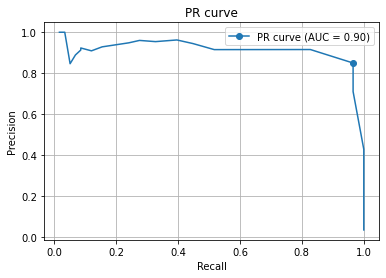

AUC：0.895133181328907
閾値：0.15789473684210525
F値：0.9038256099321496
適合率：0.8495440729483282
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=12


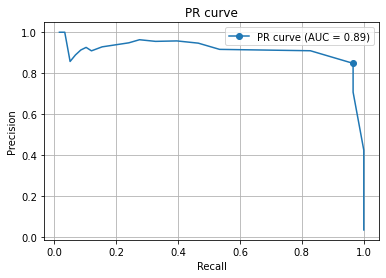

AUC：0.8948035830451736
閾値：0.15789473684210525
F値：0.9028977002822254
適合率：0.8479059515062454
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=13


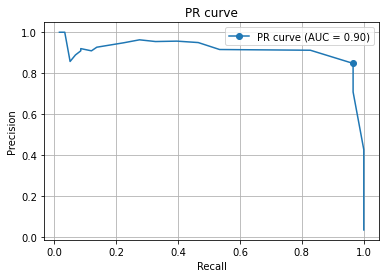

AUC：0.8956835158991416
閾値：0.15789473684210525
F値：0.902743001828668
適合率：0.8476331360946746
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=14


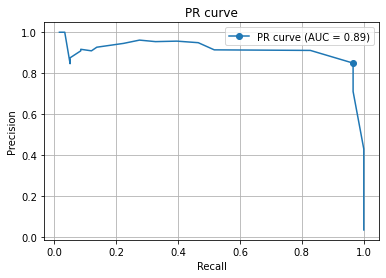

AUC：0.8947893224528759
閾値：0.15789473684210525
F値：0.9035737213781297
適合率：0.8490990990990991
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=15


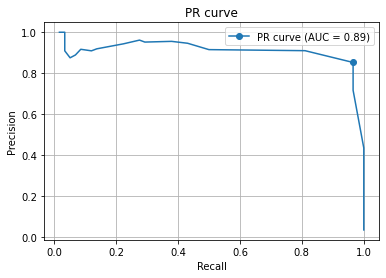

AUC：0.8919546921150503
閾値：0.15789473684210525
F値：0.9053575643143733
適合率：0.8522550544323484
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=16


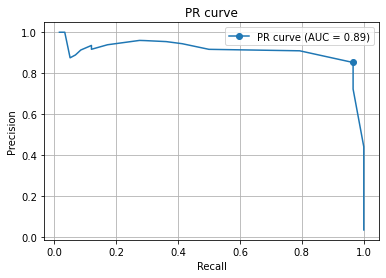

AUC：0.8934501763542965
閾値：0.15789473684210525
F値：0.9052803979254497
適合率：0.8521183053557154
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=17


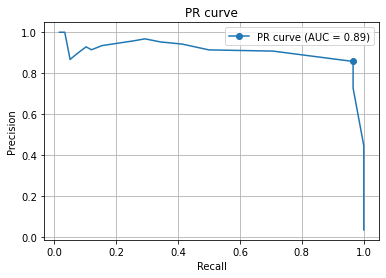

AUC：0.8905443449962801
閾値：0.15789473684210525
F値：0.908108108108108
適合率：0.8571428571428571
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=18


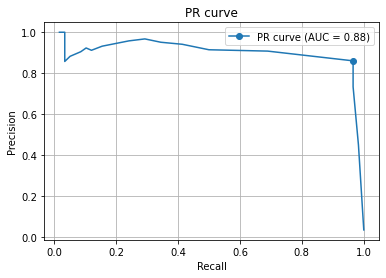

AUC：0.8834850579278465
閾値：0.15789473684210525
F値：0.9098039215686275
適合率：0.8601694915254238
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=19


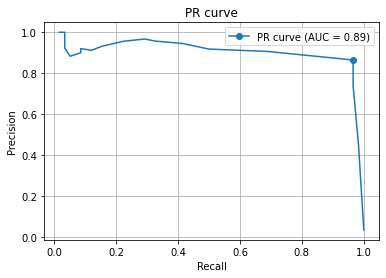

AUC：0.8853577792259139
閾値：0.15789473684210525
F値：0.9121115382109584
適合率：0.8643042350907519
再現率：0.9655172413793104
-----------------------------------------------------------------------


In [7]:
test_day=[3]
original = pd.read_csv( os.path.join(data_dir, 'learning_data_10.csv') )
for i in [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]:
    print(f'nk={i}')
    train=df[(df['label']==0)&(~df['day'].isin(test_day))][df.columns[:-2]].reset_index(drop=True)
    test=df[(df['day'].isin(test_day))][df.columns[:-2]].reset_index(drop=True)
    
    nk = i
    neigh = NearestNeighbors(n_neighbors=nk)
    neigh.fit(train)
    d = neigh.kneighbors(test)[0]
    d = np.mean(d, axis=1)
    mx = np.max(d)
    d = d / mx
    
    test_v=original[original['day'].isin(test_day)][['original', 'label']].reset_index(drop=True)
    test_v['d']=d[0]
    test_v.loc[window-1:, 'd']=d
    
    d=test_v['d'].values
    thr_bins=20
    p_score, r_score, f_score, thresholds, thr, auc = PR_curve.fig_pr(test_v, d, thr_bins)
    print(f'AUC：{auc}')
    print(f'閾値：{thr}')
    print(f'F値：{f_score.max()}')
    print(f'適合率：{p_score[np.argmax(f_score)]}')
    print(f'再現率：{r_score[np.argmax(f_score)]}')
    print('-----------------------------------------------------------------------')

# nk 20~90

nk=20


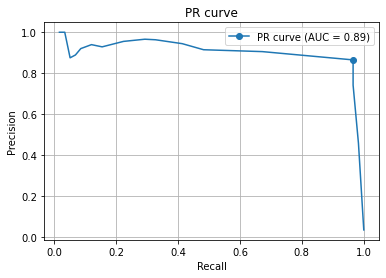

AUC：0.8857826655790714
閾値：0.15789473684210525
F値：0.9123700972175663
適合率：0.8647686832740213
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=30


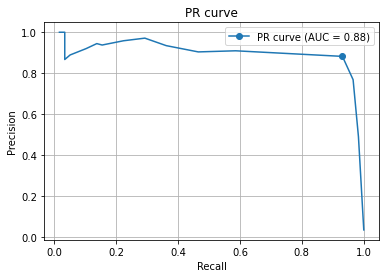

AUC：0.8822798497726942
閾値：0.15789473684210525
F値：0.9058405779355946
適合率：0.8819742489270386
再現率：0.9310344827586207
-----------------------------------------------------------------------
nk=40


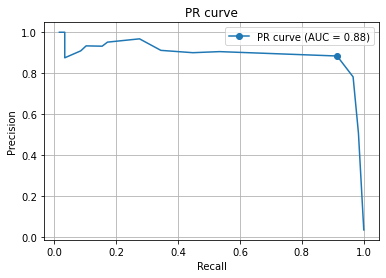

AUC：0.8774655861902063
閾値：0.15789473684210525
F値：0.8985630434532903
適合率：0.8838323353293414
再現率：0.9137931034482759
-----------------------------------------------------------------------
nk=50


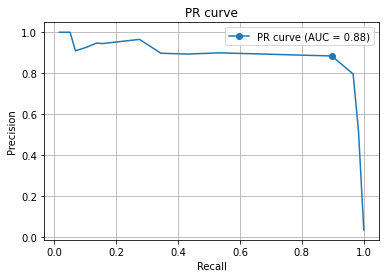

AUC：0.8774040754343515
閾値：0.15789473684210525
F値：0.8902131097868903
適合率：0.8839634941329857
再現率：0.896551724137931
-----------------------------------------------------------------------
nk=60


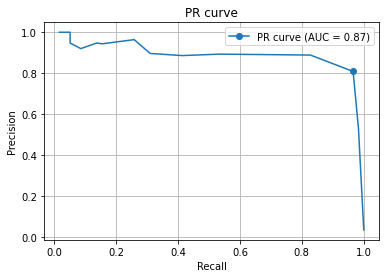

AUC：0.8720641196714758
閾値：0.10550692210961286
F値：0.8800348145640927
適合率：0.8084577114427861
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=70


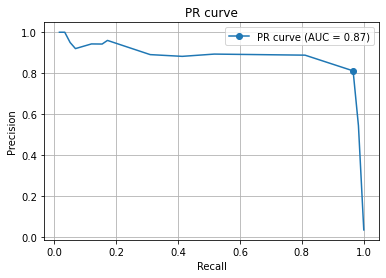

AUC：0.8678955441270351
閾値：0.10612923993688661
F値：0.8816589490638213
適合率：0.8112033195020747
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=80


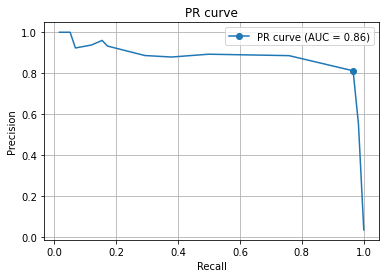

AUC：0.8632422142491725
閾値：0.106556565547988
F値：0.881871442223792
適合率：0.8115631691648822
再現率：0.9655172413793104
-----------------------------------------------------------------------
nk=90


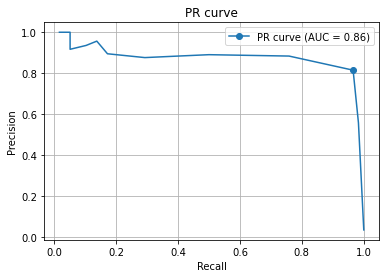

AUC：0.8584541034021973
閾値：0.10686621381724368
F値：0.8836093467623467
適合率：0.8145117294053464
再現率：0.9655172413793104
-----------------------------------------------------------------------


In [5]:
test_day=[3]
original = pd.read_csv( os.path.join(data_dir, 'learning_data_10.csv') )
for i in [20, 30, 40, 50, 60, 70, 80, 90]:
    print(f'nk={i}')
    train=df[(df['label']==0)&(~df['day'].isin(test_day))][df.columns[:-2]].reset_index(drop=True)
    test=df[(df['day'].isin(test_day))][df.columns[:-2]].reset_index(drop=True)
    
    nk = i
    neigh = NearestNeighbors(n_neighbors=nk)
    neigh.fit(train)
    d = neigh.kneighbors(test)[0]
    d = np.mean(d, axis=1)
    mx = np.max(d)
    d = d / mx
    
    test_v=original[original['day'].isin(test_day)][['original', 'label']].reset_index(drop=True)
    test_v['d']=d[0]
    test_v.loc[window-1:, 'd']=d
    
    d=test_v['d'].values
    thr_bins=20
    p_score, r_score, f_score, thresholds, thr, auc = PR_curve.fig_pr(test_v, d, thr_bins)
    print(f'AUC：{auc}')
    print(f'閾値：{thr}')
    print(f'F値：{f_score.max()}')
    print(f'適合率：{p_score[np.argmax(f_score)]}')
    print(f'再現率：{r_score[np.argmax(f_score)]}')
    print('-----------------------------------------------------------------------')